In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [3]:
import os
import pickle as pkl
from TileEM_plot_toolbox import *

In [4]:
DATA_DIR="sampletopworst5"
os.chdir(DATA_DIR)

In [5]:
objid=1

In [6]:
tiles = pkl.load(open("vtiles{}.pkl".format(objid),'r'))

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (415.665 267.768, 415.642 267.592) and LINESTRING (415.642 267.592, 415.828 269.014) at 415.6492454182532 267.64421487327479
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (352 368, 350.876 370.921) and LINESTRING (360.463 359.122, 350.876 370.921) at 350.87640449438209 370.92134831460663
ERROR:shapely.geos:TopologyException: side location conflict at 358 161


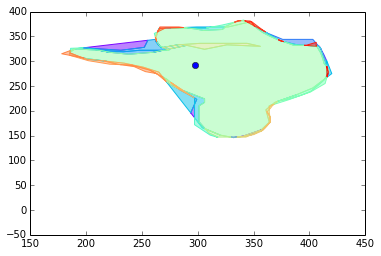

In [7]:
visualizeTilesSeparate(tiles)
jtiles,ptiles = join_tiles(range(len(tiles)),tiles)
plt.plot(jtiles.centroid.x,jtiles.centroid.y,'o')

In [8]:
for i,t in enumerate(tiles):
    if t.contains(jtiles.centroid):
        print i

44


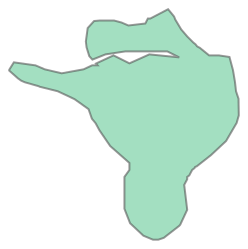

In [9]:
tiles[44]

### Adjacency Check 

In [10]:
tileA=tiles[45]
tileB=tiles[44]

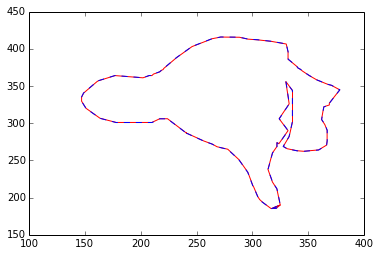

In [11]:
plot_coords(tileA)
plot_coords(tileA.buffer(0.1),color='blue',linestyle='--')
plot_coords(tileB)
plot_coords(tileB.buffer(0.1),color='blue',linestyle='--')

In [12]:
tileA.overlaps(tileB)

False

In [13]:
tileA.buffer(0.1).overlaps(tileB.buffer(0.1))

True

In [14]:
def adjacent(tileA,tileB):
    return tileA.buffer(0.1).overlaps(tileB.buffer(0.1))

In [16]:
used_tiles_adjacency

{44: 0}

In [21]:
used_tiles_adjacency

{44: 0, 81: 1}

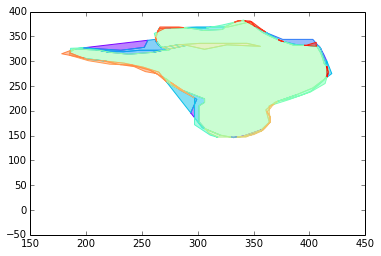

In [58]:
visualizeTilesSeparate(tiles)

In [59]:
central_tile = 44
used_tiles_adjacency ={}
used_tiles_adjacency[central_tile]=0
leftovers=range(len(tiles))
prev_tiles = [44]
d=1
while (len(leftovers)!=0):
    # prev_tiles = tiles that are at d-1 distance away 
    #d = 1 # Find all tiles that are d distance away 
# for i,t in enumerate(tiles):
    #used_tiles_iter=copy.deepcopy(used_tiles_adjacency)

    next_tiles=[]
    for utidx in prev_tiles:
        ut = tiles[utidx]
        for tidx in leftovers:
            t = tiles[tidx]
            if adjacent(t,ut):
                #print utidx,tidx
                used_tiles_adjacency[tidx]=d
                next_tiles.append(tidx)
    prev_tiles=next_tiles
    #print "Leftovers before:",len(leftovers)
    leftovers = [tidx for tidx in leftovers if tidx not in  used_tiles_adjacency.keys()]
    #print "Leftovers after:",len(leftovers)
    d+=1
    #print "prev_tiles:",prev_tiles
    #print used_tiles_adjacency

In [60]:
print used_tiles_adjacency

{0: 1, 1: 2, 2: 2, 3: 2, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 1, 10: 2, 11: 1, 12: 1, 13: 1, 14: 2, 15: 2, 16: 1, 17: 1, 18: 1, 19: 1, 20: 2, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 2, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 0, 45: 1, 46: 1, 47: 2, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 2, 56: 2, 57: 2, 58: 1, 59: 2, 60: 1, 61: 1, 62: 1, 63: 2, 64: 1, 65: 1, 66: 2, 67: 1, 68: 1, 69: 1, 70: 2, 71: 1, 72: 1, 73: 2, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1}


In [61]:
def colorbar_index(ncolors, cmap):
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))

def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """

    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki])
                       for i in xrange(N+1) ]
    # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [ ]:
# for objid in range(1,48) :
#     tiles = pkl.load(open("vtiles{}.pkl".format(objid),'r'))
#     visualizeTilesSeparate(tiles)
#     plt.title("Obj{0} [N={1}]".format(objid,len(tiles)))
#     #xylocs of the largest tile for estimating the obj size
#     xlocs,ylocs = tiles[argmax([t.area for t in tiles])].exterior.coords.xy
#     plt.ylim(min(ylocs)-100,max(ylocs)+100)
#     plt.savefig("Tiles{}.pdf".format(objid))

In [69]:
def visualizeTilesScore(tiles,tidx_score,INT_Z=True,colorful=True):
    '''
    Given a dictionary consisting of {tidx:score} 
    Plot a heatmap of values
    INT_Z: integet z value colormap
    '''
    plt.figure()
    #colors=cm.rainbow(np.linspace(0,1,len(set(tidx_score.values()))+1))

    score = tidx_score.values()
    norm = matplotlib.colors.Normalize(
        vmin=np.min(score),
        vmax=np.max(score))
    c_m = cm.rainbow

    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
    s_m.set_array([])

    for tidx,i in tidx_score.iteritems(): 
        t=tiles[tidx]
        if colorful: 
            c=s_m.to_rgba(i)
        else: 
            c="lime"
        if type(t)==shapely.geometry.polygon.Polygon:
            plot_coords(t,color=c,reverse_xy=True,fill_color=c)
        elif type(t)==shapely.geometry.MultiPolygon or type(t)==shapely.geometry.collection:
            for region in t:
                if type(t)!=shapely.geometry.LineString:
                    plot_coords(region,color=c,reverse_xy=True,fill_color=c)

    if INT_Z:
        colorbar_index(ncolors=len(set(score)), cmap=c_m)
    else:
        plt.colorbar(s_m)
    #xylocs of the largest tile for estimating the obj size
    xlocs,ylocs = tiles[argmax([t.area for t in tiles])].exterior.coords.xy
    plt.ylim(min(ylocs)-50,max(ylocs)+50)

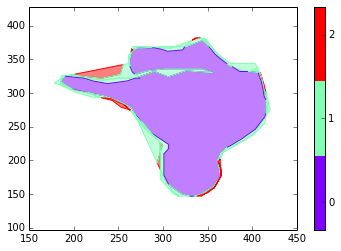

In [70]:
visualizeTilesScore(tiles,tidx_score)

In [ ]:
DATA_DIR="sampletopworst5"
os.chdir(DATA_DIR)

In [71]:
def adjacent(tileA,tileB):
    return tileA.buffer(0.1).overlaps(tileB.buffer(0.1))

In [120]:
def compute_adjacency_score(objid,CHECK=True):
    tiles = pkl.load(open("vtiles{}.pkl".format(objid),'r'))
    jtiles,ptiles = join_tiles(range(len(tiles)),tiles)
    if CHECK: 
        visualizeTilesSeparate(tiles)
        plt.title("Obj{}: Check Centroid inside central tile ".format(objid))
        plt.plot(jtiles.centroid.x,jtiles.centroid.y,'o')
        
    # Find the tile index of the tile that contains the centroid
    central_tidx =  -1
    for i,t in enumerate(tiles):
        if t.contains(jtiles.centroid):
            central_tidx =  i
            break
    if CHECK: 
        plt.figure()
        plt.title("Shape of Central Tile")
        plot_coords(tiles[central_tidx],reverse_xy=True)
        
    tiles_adjacency ={}
    tiles_adjacency[central_tidx]=0
    leftovers=range(len(tiles))
    prev_tiles = [central_tidx]
    d=1
    while (len(leftovers)!=0):
        # prev_tiles = tiles that are at d-1 distance away 
        #d = 1 # Find all tiles that are d distance away 
    # for i,t in enumerate(tiles):
        #used_tiles_iter=copy.deepcopy(used_tiles_adjacency)
        next_tiles=[]
        for utidx in prev_tiles:
            ut = tiles[utidx]
            for tidx in leftovers:
                t = tiles[tidx]
                if adjacent(t,ut):
                    #print utidx,tidx
                    tiles_adjacency[tidx]=d
                    next_tiles.append(tidx)
        prev_tiles=next_tiles
        #print "Leftovers before:",len(leftovers)
        leftovers = [tidx for tidx in leftovers if tidx not in  tiles_adjacency.keys()]
        print "d= {} iteration".format(d)
        print "Leftovers after:",len(leftovers)
        d+=1
    if CHECK: 
        visualizeTilesScore(tiles,tiles_adjacency)
        plt.title("Tile Adjacency Score Heatmap ")
    return tiles_adjacency

In [114]:
cd ../final_all_tiles/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/final_all_tiles


In [ ]:
tiles_adjacency = compute_adjacency_score(18)

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (186.539 170.478, 186.539 170.478) and LINESTRING (186.539 170.478, 186.539 170.478) at 186.53888888888909 170.47777777777779
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (121.143 342.429, 118.302 342.279) and LINESTRING (117.722 342.155, 118.302 342.279) at 118.30232558139539 342.27906976744185
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (107.037 191.63, 107.034 191.423) and LINESTRING (107.036 191.576, 107.028 190.978) at 107.034406531145 191.44286371129428
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (112.733 341.467, 112.929 341.5) and LINESTRING (112.899 341.495, 111.969 341.336) at 112.89358439209856 341.49402660352905
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (112.968 341.507, 112.948 341.503) and LINESTRING (112.968 341.507, 112

  0%|          | 0/20 [00:00<?, ?it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (431.32 203.156, 440 200) and LINESTRING (433.206 202.47, 431.411 203.123) at 432.10257622383733 202.87179046405913
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (439 193, 438.704 193.222) and LINESTRING (438.667 193.286, 439 193) at 438.99999999999983 193.00000000000014
ERROR:shapely.geos:TopologyException: side location conflict at 472.1875 129.1875
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (501 206, 500.556 197.111) and LINESTRING (500.576 197.514, 500.556 197.111) at 500.56197849992645 197.23956999852919
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (496.737 180.684, 497 182) and LINESTRING (497.415 181.927, 495.732 178.842) at 496.73684210526318 180.68421052631584
 15%|█▌        | 3/20 [00:06<00:34,  0.50it/s]ERROR:shapely.geos:TopologyE

KeyboardInterrupt: 

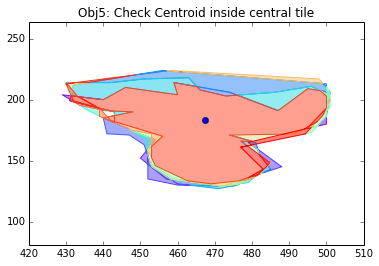

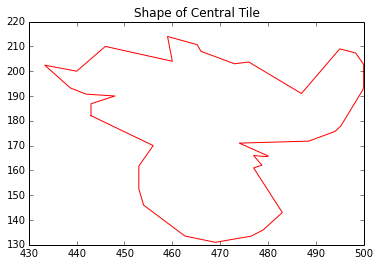

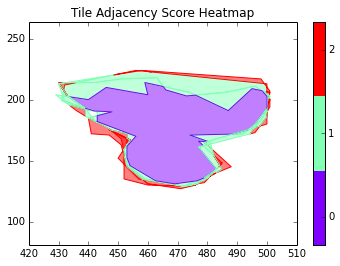

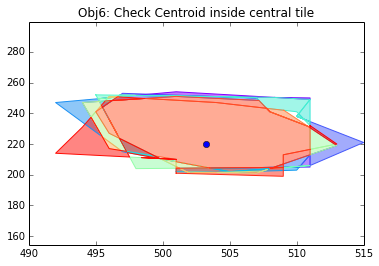

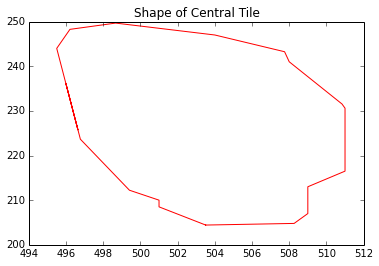

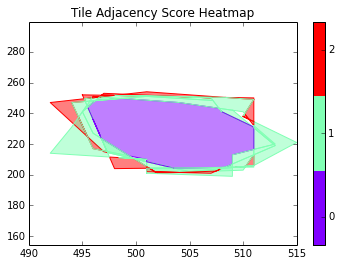

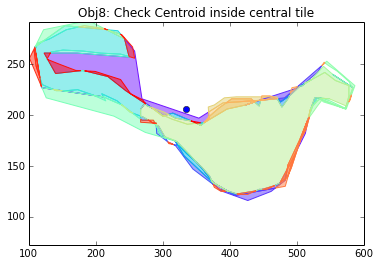

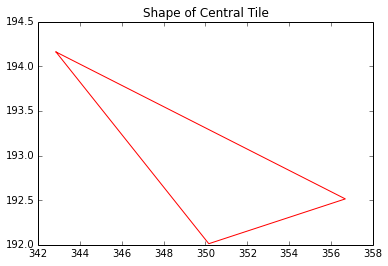

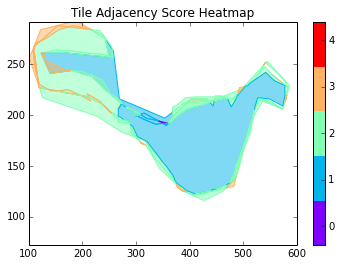

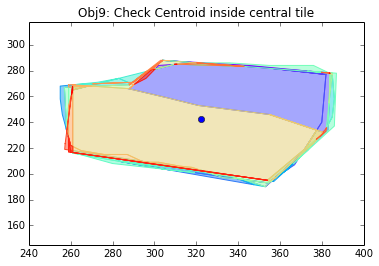

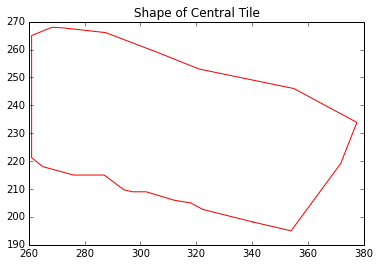

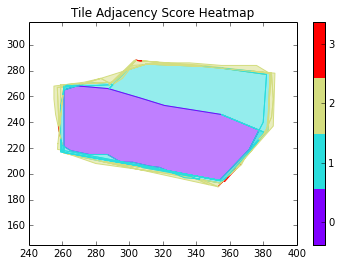

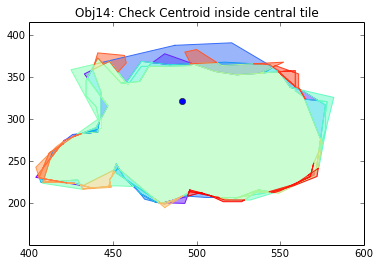

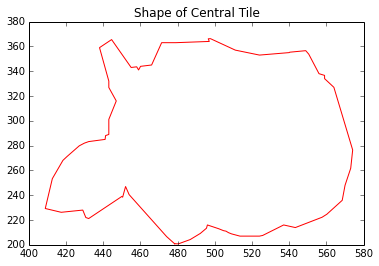

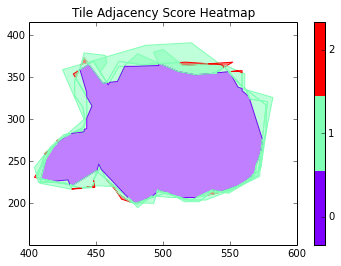

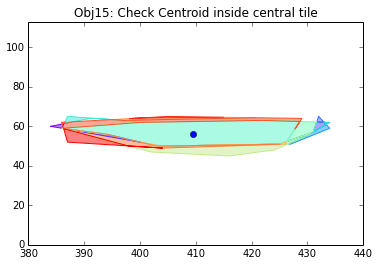

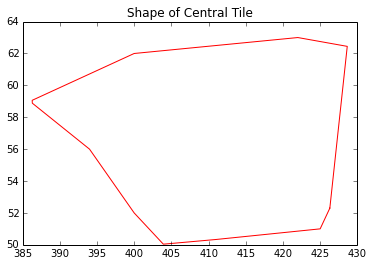

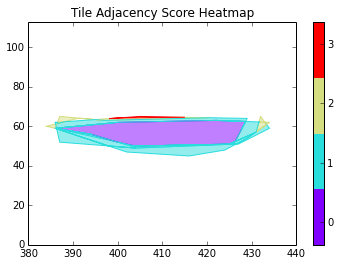

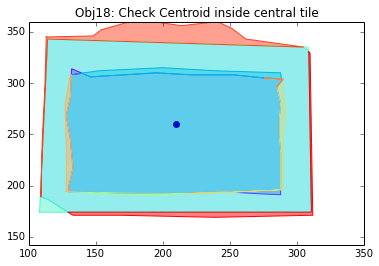

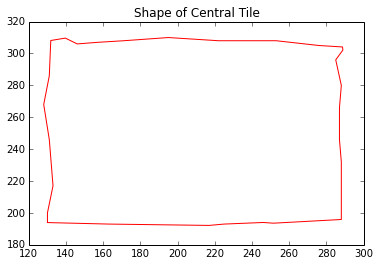

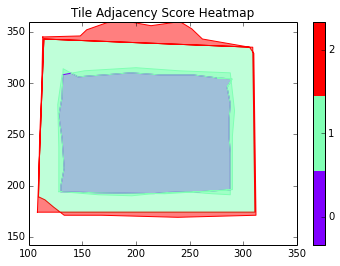

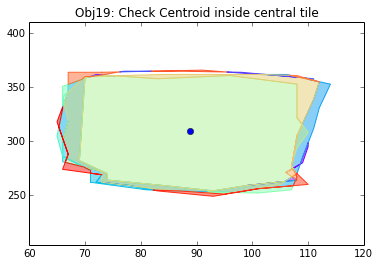

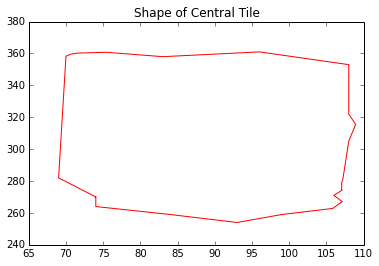

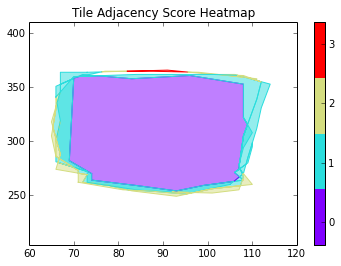

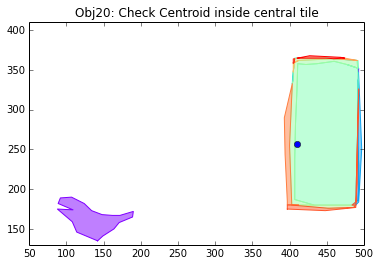

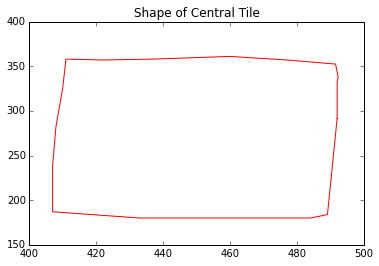

In [110]:
selected_objids=[ 5,  6,  8,  9, 14, 15, 18, 19, 20, 21, 23, 24, 25, 27, 29, 30,33, 35, 37, 46]
for objid in tqdm(selected_objids):
    tiles_adjacency = compute_adjacency_score(objid)

In [ ]:
# tiles_adjacency = compute_adjacency_score(15)